Calsificación de Clientes según su personalidad. 

---
En la base de datos _analisis.csv_ encontrará datos de famosos obtenidos midiendo su actividad en la red social Twitter. La idea es determinar, en base a los atributos, qué famosos son semejantes entre sí y qué famosos son distintos, también resulta interesante comprender cuántos tipos de perfiles se encontrará según la actividad en Twitter. 

Los atributos son los siguientes:

- usuario: Nombre en Twitter
- op: Openness to experience (grado de apertura mental a nuevas experiencias, curiosidad)
- co: Conscientiousness (grado de orden, prolijidad, organización)
- ex: Extraversion (grado de timidez ante el grupo social)
- ag: Agreeableness (grado de empatía con los demás)
- ne: Neuroticism (grado de neuroticismo, irritabilidad)
- Wordcount: Cantidad promedio de palabras usadas en sus tweets
- Categoria: Actividad laboral del usuario, dentro de los siguientes:
  1. Actor/actriz
  2. Cantante
  3. Modelo
  4. Tv, series
  5. Radio
  6. Tecnología
  7. Deportes
  8. Politica
  9. Escritor

# **Setup**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Rwyld/Data-Science-Models/main/Modelos/KMeans/AnalisisCSV%20-%20KMeans.csv')
data.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [ ]:
#Dejando como índice la variable usuario 
newData = data.set_index('usuario')
newData.head(3)

,op,co,ex,ag,ne,wordcount,categoria
usuario,,,,,,,
3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4


# **Analisis Exploratorio**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   usuario    140 non-null    object 
 1   op         140 non-null    float64
 2   co         140 non-null    float64
 3   ex         140 non-null    float64
 4   ag         140 non-null    float64
 5   ne         140 non-null    float64
 6   wordcount  140 non-null    float64
 7   categoria  140 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 8.9+ KB


In [ ]:
data.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [ ]:
graphData = data.drop('usuario', axis = 1)

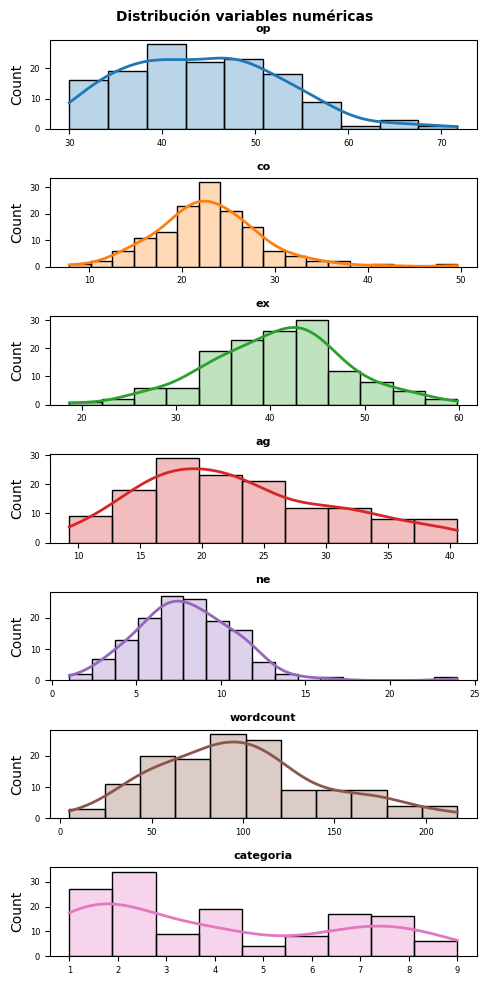

In [ ]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(5,10))
axes = axes.flat
data = graphData.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(graphData):
    sns.histplot(
        data    = graphData,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 8, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top = .95)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

# **Relacion entre OP, EX y AG**

In [ ]:
df2 = newData[['op', 'ex', 'ag']]

matrix = df2.corr()

print(matrix)

          op        ex        ag
op  1.000000 -0.508838 -0.662599
ex -0.508838  1.000000  0.497006
ag -0.662599  0.497006  1.000000


In [ ]:
corrCategorias = newData.groupby('categoria')[['op', 'ex', 'ag']].mean()

print(corrCategorias)

                  op         ex         ag
categoria                                 
1          47.599524  37.814078  21.095502
2          49.948019  39.543389  19.527262
3          48.951536  38.323446  18.020977
4          41.119747  45.664144  28.647621
5          37.761293  47.573855  32.467467
6          43.712496  42.439017  22.648632
7          38.970436  42.331862  24.718625
8          38.228891  38.634536  22.860346
9          39.646524  43.572170  28.592302


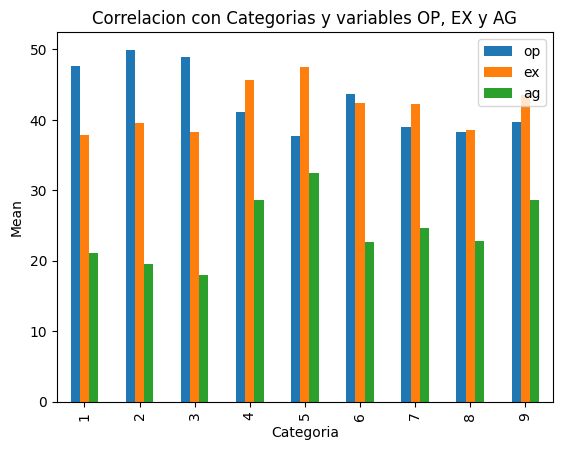

In [ ]:
corrCategorias.plot(kind='bar')

plt.xlabel('Categoria')
plt.ylabel('Mean')
plt.title('Correlacion con Categorias y variables OP, EX y AG')

plt.show()

# **Modelando K-Means**

In [ ]:
modelData = graphData

kmeans = KMeans(
    init="random",
    n_clusters=9,
    n_init=10,
    max_iter=300,
    random_state=1234
)

kmeans.fit(modelData)

KMeans(init='random', n_clusters=9, n_init=10, random_state=1234)

In [ ]:
kmeans.labels_

array([0, 1, 6, 8, 6, 0, 7, 8, 3, 5, 1, 0, 4, 4, 5, 6, 6, 5, 4, 8, 0, 3,
       2, 8, 1, 3, 8, 4, 0, 4, 5, 4, 4, 4, 8, 6, 6, 8, 7, 3, 0, 6, 0, 5,
       1, 1, 1, 4, 0, 8, 1, 6, 6, 2, 6, 1, 4, 7, 5, 4, 5, 7, 4, 4, 7, 6,
       3, 5, 1, 7, 1, 3, 5, 4, 3, 4, 5, 6, 6, 8, 8, 7, 4, 3, 1, 6, 1, 4,
       1, 3, 1, 7, 3, 1, 5, 8, 6, 4, 6, 4, 5, 3, 1, 8, 3, 3, 8, 8, 1, 0,
       1, 8, 8, 0, 7, 1, 4, 1, 8, 7, 7, 8, 0, 4, 1, 2, 6, 1, 3, 3, 3, 4,
       4, 7, 4, 6, 6, 1, 4, 7], dtype=int32)

In [ ]:
clusterData = pd.DataFrame(modelData)
clusterData['cluster'] = kmeans.labels_
clusterData[clusterData['cluster'] == 1].head()

,op,co,ex,ag,ne,wordcount,categoria,cluster
1,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7,1
10,52.750992,24.706565,41.698855,17.057176,8.279847,97.2901,3,1
24,47.276860,29.773140,41.973372,12.401860,7.285116,79.4186,2,1
44,52.535221,37.277168,35.290973,15.793009,5.702301,95.8673,1,1
45,56.691163,34.262326,31.135698,20.439651,11.337791,92.1512,2,1


In [ ]:
# El valor más bajo de SSE
print("El valor más bajo de SSE: ",kmeans.inertia_)
print("")
# Ubicaciones finales del centroide
print("Ubicaciones finales del centroide",kmeans.cluster_centers_)
print("")
# El número de iteraciones necesarias para converger
print("El número de iteraciones necesarias para converger",kmeans.n_iter_)

El valor más bajo de SSE:  27655.333255176036

Ubicaciones finales del centroide [[ 41.56307609  20.71037027  45.58306355  27.38590282   7.78928464
   36.60741818   4.54545455]
 [ 50.933755    25.53366896  38.45474174  17.55631765   8.36402048
   89.26654348   3.        ]
 [ 45.95188233  19.05974433  23.859684    13.683926     7.43333367
   12.04336667   2.        ]
 [ 49.83898738  23.77663325  37.10270906  18.94541788   7.64712581
  152.0215375    3.1875    ]
 [ 50.72671568  23.69936864  37.74280592  17.91307392   7.92087392
  116.706136     2.56      ]
 [ 42.02802267  27.42770708  36.88980575  20.97684308  10.095242
  189.56625833   5.41666667]
 [ 38.70702426  21.10158411  44.03371895  30.86337268   7.79310574
   53.65         5.10526316]
 [ 39.95513431  23.71532762  43.13859685  23.44014585   7.69246292
  102.20118462   5.23076923]
 [ 34.81881706  18.51439239  48.45747333  31.59445939   7.22607178
   75.30372222   5.38888889]]

El número de iteraciones necesarias para converger 13


# **Determinando el mejor K**




In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 1234,
}

# Una lista contiene los valores de SSE para cada k
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(modelData)
    sse.append(kmeans.inertia_)

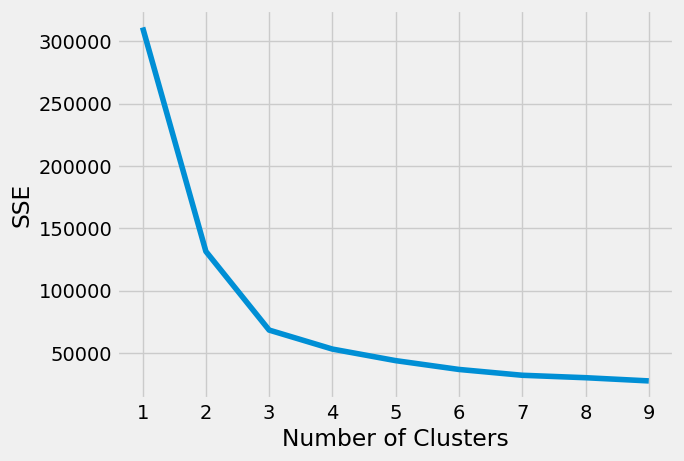

In [ ]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 10), sse)
 plt.xticks(range(1, 10))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

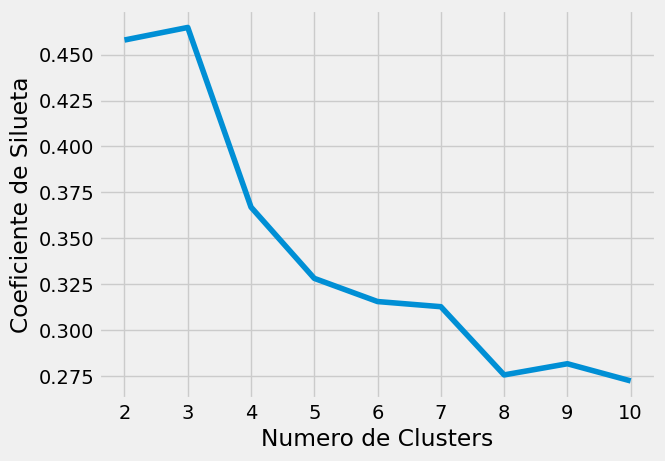

In [ ]:
# Una lista contiene los coeficientes de silueta para cada k
silhouette_coefficients = []

# Empezamos con 2 grupos para el coeficiente de silueta
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(modelData)
    score = silhouette_score(modelData, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Numero de Clusters")
plt.ylabel("Coeficiente de Silueta")
plt.show()

# **Visualizacion con el mejor K**

In [ ]:
modelData = graphData

kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=1234
)

kmeans.fit(modelData)

KMeans(init='random', n_clusters=3, n_init=10, random_state=1234)

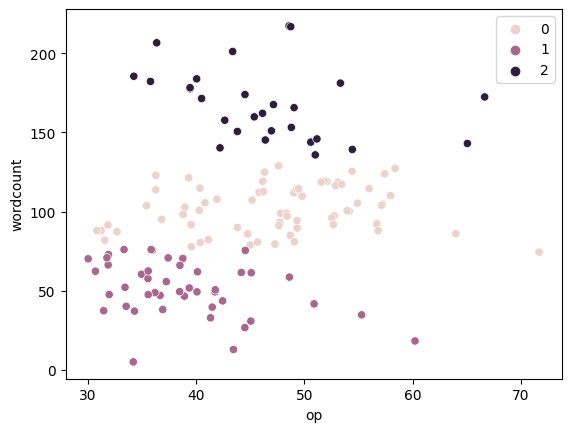

In [ ]:
sns.scatterplot(x=modelData.op, y=modelData.wordcount, hue=kmeans.labels_);

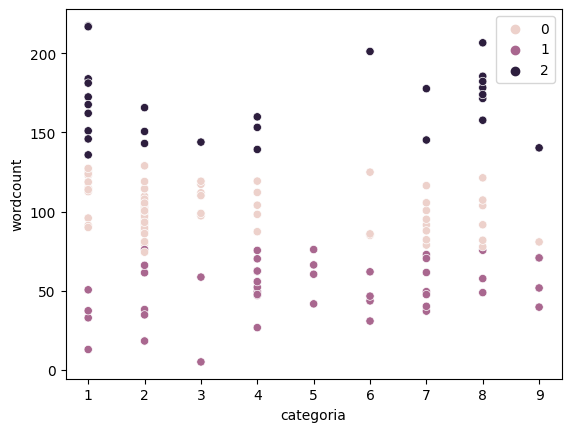

In [ ]:
sns.scatterplot(x=modelData.categoria, y=modelData.wordcount, hue=kmeans.labels_);
plt.legend(loc='upper right')

In [ ]:
# El valor más bajo de SSE
print("El valor más bajo de SSE: ",kmeans.inertia_)
print("")
# Ubicaciones finales del centroide
print("Ubicaciones finales del centroide",kmeans.cluster_centers_)
print("")
# El número de iteraciones necesarias para converger
print("El número de iteraciones necesarias para converger",kmeans.n_iter_)

El valor más bajo de SSE:  68391.9712543565

Ubicaciones finales del centroide [[ 47.2425514   23.91600052  40.13164636  19.99707409   7.93251904
  101.53036119   3.46268657   3.91044776]
 [ 38.9118158   20.10818429  44.04174649  29.19869211   7.66751098
   51.34430667   4.86666667   4.8       ]
 [ 46.49143107  25.34137918  37.01146479  19.81602868   8.69631846
  168.11213214   4.14285714   3.85714286]]

El número de iteraciones necesarias para converger 7


# **Visualizando por Actividades en el Cluster**

cluster
0    67
1    45
2    28
Name: categoria, dtype: int64

<Axes: xlabel='cluster'>

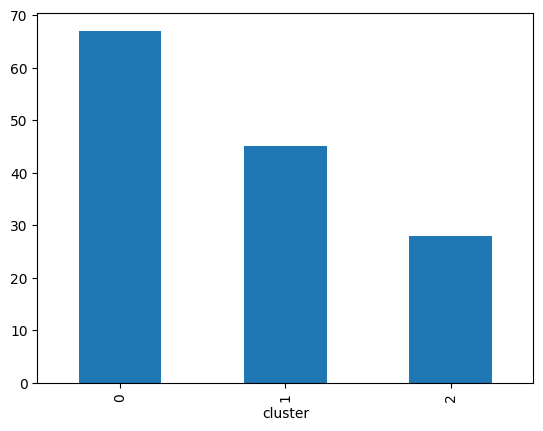

In [ ]:
newClusterData = pd.DataFrame(modelData)
newClusterData['cluster'] = kmeans.labels_


result = pd.DataFrame(newClusterData)

result = result.groupby('cluster')['categoria'].count()
display(result)
result.plot(kind='bar')

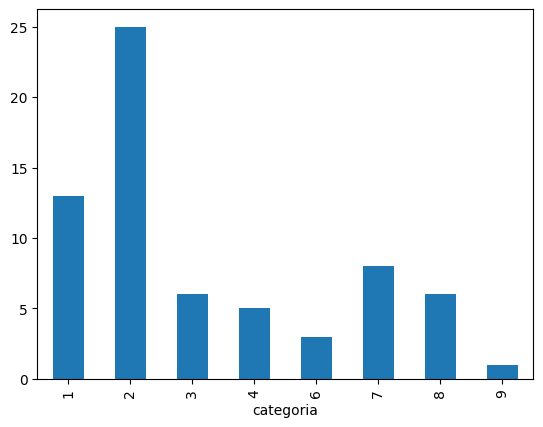

In [ ]:
cluster1 = newClusterData[newClusterData.cluster == 0]
resultCluster1 = cluster1.groupby('categoria')['categoria'].count()
ax = resultCluster1.plot(kind='bar')

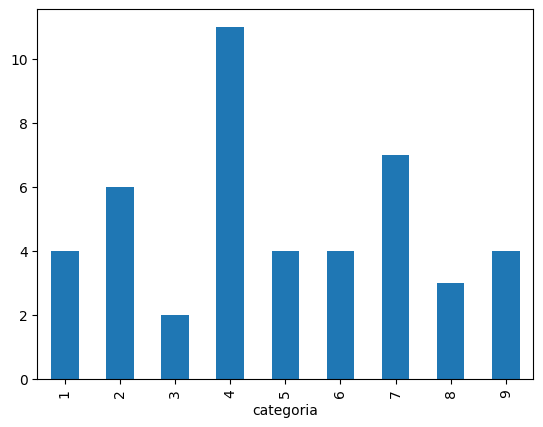

In [ ]:
cluster2 = newClusterData[newClusterData.cluster == 1]
resultCluster2 = cluster2.groupby('categoria')['categoria'].count()
ax = resultCluster2.plot(kind='bar')

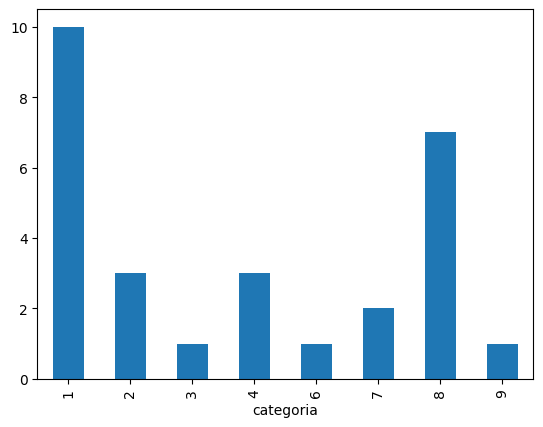

In [ ]:
cluster3 = newClusterData[newClusterData.cluster == 2]
resultCluster3 = cluster3.groupby('categoria')['categoria'].count()
ax = resultCluster3.plot(kind='bar')

# **Interpretando**



En conclusion, en el modelo de KMeans, la cantidad de clusters optimos segun el analisis de codo y de silueta, es de un valor K de 3.

Luego, al observar cada cluster por separados:

- 67 personas con personalidad similar en el primer cluster, donde se destacan las profesiones de Actor(1) y Cantante(2).
- 45 personas con personalidad similar en el segundo cluster, donde se destacan las profesiones TV(4), Deportes(7) y Cantante(2).
- 28 personas con personalidad similar en el ultimo cluster, donde se destacan las profesiones Actor(1) y Politica(8).
